In [1]:
# 인프런 딥러닝 CNN 완벽가이드 강의 내용 중에서...

import numpy as np # 선형대수 
import pandas as pd # 데이터 처리

In [2]:
# datasets 모듈에서 fashion_mnist 모듈 가져오기
from tensorflow.keras.datasets import fashion_mnist

# 전체 6만개 데이터 중, 5만개는 학습 데이터용, 1만개는 테스트 데이터용으로 분리
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# image size는 28x28의 grayscale 2차원 데이터
print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

4423680/4422102 [==============================] - 0s 0us/step
train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)



### MNIST image array 시각화

Text(0.5, 1.0, '9')

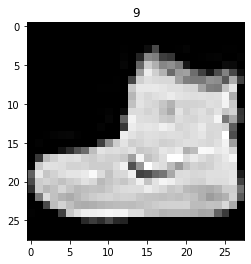

In [3]:
# %matplotlib inline
# matplotlib.pyplot MATLAB과 비슷하게 명령어 스타일로 동작하는 함수의 모음
import matplotlib.pyplot as plt
# 데이터를 비트맵이미지로 보여 준다. 
plt.imshow(train_images[0], cmap='gray') # (28,28) 으로 되어 있는 데이터를 gray 컬러맵으로 보여준다. 
plt.title(train_labels[0]) # 정답 레이블 : 9 
# plt.show()

In [4]:
# 6만개의 이미지가 있다. 각각은 (28,28) 의 흑백이미지이다.
train_images.shape

(60000, 28, 28)

In [5]:
train_images[0,10:15,:], train_labels[0] # 0번의 일부 숫자와 라벨을 프린트 한다.

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
         202,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
         219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
         209,  52],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
         244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
         167,  56],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
         236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
          92,   0],
        [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
         226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
          77,   0]], dtype=uint8), 9)

In [6]:
# 라벨에 해당하는 이름을 리스트로 만들자.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
# image를 여러개 동시에 프린트 하는 함수
def show_images(images, labels, ncols=8):
    # (22,6) 사이즈로, 1개 행으로, 8개의 그림을 그리자. (레이아웃 지정)
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    # 8개의 그림을 그려라. 이미지객체의 0~7번 인덱스
    for i in range(ncols):
        axs[i].imshow(images[i], cmap='gray')
        axs[i].set_title(class_names[labels[i]])

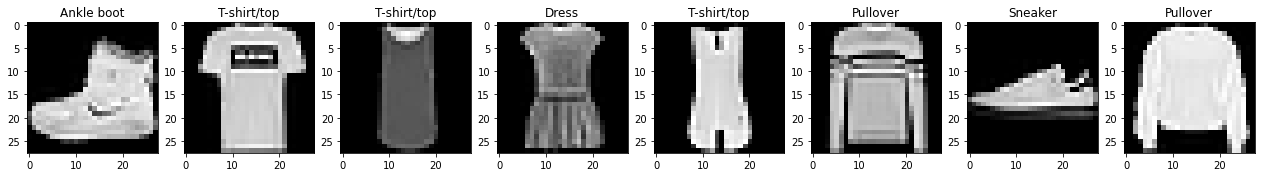

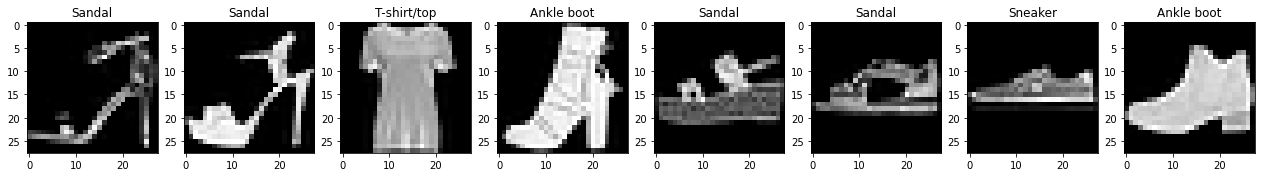

In [8]:
# 함수를 콜한다.(0~7)        
show_images(train_images[:8], train_labels[:8], ncols=8)
# 함수를 한번더 콜한다. (8~15)
show_images(train_images[8:16], train_labels[8:16], ncols=8)

In [9]:
# fashin_mnist dataset을 numpy array 타입의 아래 변수셋으로 로드한다. (케라스 내장함수)
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [10]:
# images, labels 변수를 입력받아, 표준화된 image, labels 값을 리턴하는 함수 : get_preprocessed_data
def get_preprocessed_data(images, labels):
    # 0~1 사이값으로 scale, float32 로
    images = np.array(images/255.0, dtype=np.float32)
    # float32 로
    labels = np.array(labels, dtype=np.float32)
    return images, labels

In [11]:
# train data 전처리
train_images, train_labels = get_preprocessed_data(train_images, train_labels)
# test data 전처리
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

In [12]:
# 전처리가 잘 되었는지 확인해 본다.
train_images[0,10:15,:]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.75686276, 0.89411765,
        0.85490197, 0.8352941 , 0.7764706 , 0.7058824 , 0.83137256,
        0.8235294 , 0.827451  , 0.8352941 , 0.8745098 , 0.8627451 ,
        0.9529412 , 0.7921569 , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.01176471, 0.        , 0.04705882, 0.85882354, 0.8627451 ,
        0.83137256, 0.85490197, 0.7529412 , 0.6627451 , 0.8901961 ,
        0.8156863 , 0.85490197, 0.8784314 , 0.83137256, 0.8862745 ,
        0.77254903, 0.81960785, 0.20392157],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02352941, 0.        , 0.3882353 , 0.95686275, 0.87058824,
        0.8627451 , 0.8549

In [13]:
??Sequential

Object `Sequential` not found.


In [14]:
# 입력층 (28*28)
INPUT_SIZE = 28

# layers 모듈의 Dense (Affine 층), Flatten (Input의 shape을 1차원으로 평평하게 한다.) 클래스를 사용하자.
from tensorflow.keras.layers import Dense, Flatten
# tf.keras 모듈의 Sequential 클래스는 선형의 layer를 세로로 붙여 모델(tf.keras.model)을 만든다.
from tensorflow.keras import Sequential

# Sequential Model을 만든다.
model = Sequential([
    # Input을 받는다. 28*28을 계산하기 귀찮으므로, Flatten 클래스를 사용한다.
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    # 1번째 은닉층 100개의 노드가 있으며, 활성화 함수는 relu다. (784 + 1) * 100 = 78500
    Dense(100, activation='relu'),
    # 2번째 은닉층 30개의 노드가 있으며, 활성화 함수는 relu다. (100 + 1) * 30 = 3030
    Dense(30, activation='relu'),
    # 3번째 output층은 10개의 노드가 있으며, 활성화 함수는 softmax다. (30 + 1) * 10 = 310
    Dense(10, activation='softmax')
])

# 모델의 내용을 출력한다.
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [18]:
# one hot encoding (vector -> matrix)
from tensorflow.keras.utils import to_categorical
# ont hot label : 0~9 벡터를 행렬로.
train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)

print(train_oh_labels.shape, test_oh_labels.shape)

(60000, 10) (10000, 10)


In [ ]:
history = model.fit(x=train_images, y=train_oh_labels, batch_size=32, epochs=20, verbose=1)

In [ ]:
print(history.history['loss'])
print(history.history['accuracy'])


### 테스트 데이터를 기반으로 Label 값 예측
* model.predict()를 이용하여 label값 예측
* predict()의 인자로 입력되는 feature array는 학습의 feature array와 shape가 동일해야함. 
* fit() 시 3차원(28x28 2차원 array가 여러개 존재) array 입력 했으므로 predict()도 동일한 3차원 데이터 입력
* 특히 한건만 predict() 할때도 3차원 데이터여야 함. 이를 위해 expand_dims()로 2차원 image 배열을 3차원으로 변경

In [ ]:
test_images.shape

In [ ]:
pred_proba = model.predict(test_images)
print(pred_proba.shape)

In [ ]:
np.expand_dims(test_images[0], axis=0).shape

In [ ]:
pred_proba = model.predict(np.expand_dims(test_images[0], axis=0))
print('softmax output:', pred_proba)
pred = np.argmax(np.squeeze(pred_proba))
print('predicted class value:', pred)


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print('target class value:', test_labels[0], 'predicted class value:', pred)

### 테스트 데이터 세트로 모델 성능 검증

In [ ]:
model.evaluate(test_images, test_oh_labels, batch_size=64)

### 검증 데이터 세트를 이용하여 학습 수행. 
* 일반적으로 fit() 수행시 별도의 검증 데이터 세트를 이용하여 학습 시 과적합(Overfitting)이 발생하는지 모니터링
* fit()을 수행하면 iteration을 반복하기 때문에 중간에 하이퍼파라미터 변경(예: Learning Rate)등의 작업이 어려움. 
* fit() iteration시 여러 작업을 하기 위해 Callback 객체를 가짐. 
* 검증 데이터 세트를 fit() 시 적용하여 과적합이나 더이상 검증 데이터 성능이 좋아 지지 않을 때 Callback을 사용하여 Learning Rate 보정 작업등을 수행 가능

In [ ]:
import numpy as np 
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 기존 학습 데이터를 다시 학습과 검증 데이터 세트로 분리
tr_images, val_images, tr_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.15, random_state=2021)
print('train과 validation shape:', tr_images.shape, tr_labels.shape, val_images.shape, val_labels.shape)

# OHE 적용
tr_oh_labels = to_categorical(tr_labels)
val_oh_labels = to_categorical(val_labels)

print('after OHE:', tr_oh_labels.shape, val_oh_labels.shape)

### 검증 데이터 세트를 적용하여 학습 수행. 

In [ ]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

INPUT_SIZE = 28
model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, validation_data=(val_images, val_oh_labels), 
                    epochs=20, verbose=1)

In [ ]:
print(history.history['loss'])
print(history.history['accuracy'])
print(history.history['val_loss'])
print(history.history['val_accuracy'])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.legend()

### Functional API

In [ ]:
# Sequential Model을 이용하여 Keras 모델 생성 
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

INPUT_SIZE = 28

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

model1 = Sequential()
model1.add(Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)))
model1.add(Dense(100, activation='relu'))
model1.add(Dense(30, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.summary()


In [ ]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
x = Flatten()(input_tensor)
x = Dense(100, activation='relu')(x)
x = Dense(30, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

### Custom한 Dense Layer 생성하기

In [ ]:
from tensorflow.keras.layers import Layer, Input
from tensorflow.keras.models import Model
import tensorflow as tf

class CustomDense(tf.keras.layers.Layer):
    # CustomDense 객체 생성시 입력되는 초기화 parameter 처리
    def __init__(self, units=32):
        super(CustomDense, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=True,
        )
        self.b = self.add_weight(
            shape=(self.units,), initializer="random_normal", trainable=True
        )
        
    # CustomDense 객체에 callable로 입력된 입력 데이터 처리. 
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

# input 값을 4개의 원소를 가지는 1차원으로 생성. 
inputs = Input((4,))
# 10개의 unit을 가지는 CustomDense 객체를 생성 후 callable로 inputs값 입력 
outputs = CustomDense(10)(inputs)

# inputs와 outputs로 model 생성. 
model = Model(inputs, outputs)
model.summary()


### Functional API는 객체 생성 부분과 Callable 인자 입력 부분을 별도로 수행해도 무방. 

In [ ]:
inputs = Input((4,))
# 10개의 unit을 가지는 CustomDense 객체를 생성 후 callable로 inputs값 입력 
my_layer = CustomDense(10)
outputs = my_layer(inputs)

# inputs와 outputs로 model 생성. 
model = Model(inputs, outputs)
model.summary()

### Sequential Model 생성은 단지 Functional API Layer들을 iteration 하면서 연결한 것을 model로 만든 것임

In [ ]:
from tensorflow.keras.models import Sequential

model = Sequential([Input((4,)),
                   CustomDense(10),
                   CustomDense(8), 
                   tf.keras.layers.ReLU()])
model.summary()

### Sequential Model을 Functional 객체를 For loop 반복 호출하여 작성.

In [ ]:
layers_list = [Input((4,)), CustomDense(10), CustomDense(8), tf.keras.layers.ReLU()]

for index, layer in enumerate(layers_list):
        print(index, layer)

In [ ]:
layers_list = [Input((4,)), CustomDense(10), CustomDense(8), tf.keras.layers.ReLU()]

inputs = None
callable_inputs = None
outputs = None
# layers_list에 있는 Functional 객체를 iteration 수행하면서 적용. 
for index, layer in enumerate(layers_list):
    # layers_list의 첫번째 인자는 Input 간주. 
    if index == 0:
        inputs = layer
        callable_inputs = layer
    # Functional 객체에 callable 인자로 callable_inputs를 입력하고 반환 결과 값을 다시 callable_inputs로 할당.     
    else: 
        callable_inputs = layer(callable_inputs)
    
outputs = callable_inputs
model = Model(inputs, outputs)
model.summary()


### 앞에서 생성한 로직들을 함수화 
* Functional API로 모델 만들기
* pixel값 1 ~ 255를 0 ~ 1사이값 Float 32로 만들기
* One Hot Encoding Label에 적용하기
* 학습과 검증 데이터로 나누기.
* compile, 학습/예측/평가

In [ ]:
from tensorflow.keras.layers import Layer, Input, Dense, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf

INPUT_SIZE = 28

def create_model():
    input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
    x = Flatten()(input_tensor)
    x = Dense(100, activation='relu')(x)
    x = Dense(30, activation='relu')(x)
    output = Dense(10, activation='softmax')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    return model


In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 0 ~ 1사이값의 float32로 변경하는 함수
def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

# 0 ~ 1사이값 float32로 변경하는 함수 호출 한 뒤 OHE 적용 
def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    # OHE 적용 
    oh_labels = to_categorical(labels)
    return images, oh_labels

# 학습/검증/테스트 데이터 세트에 전처리 및 OHE 적용한 뒤 반환 
def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021):
    # 학습 및 테스트 데이터 세트를  0 ~ 1사이값 float32로 변경 및 OHE 적용. 
    train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
    test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
    
    # 학습 데이터를 검증 데이터 세트로 다시 분리
    tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)
    
    return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels ) 


In [ ]:
from tensorflow.keras.datasets import fashion_mnist
# Fashion MNIST 데이터 재 로딩 및 전처리 적용하여 학습/검증/데이터 세트 생성. 

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
    get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)
print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_labels.shape)


In [ ]:
from tensorflow.keras.optimizers import Adam

# Model 생성 및 optimizer, loss, metric 적용
model = create_model()
model.summary()

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# 학습 수행. 
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=20, validation_data=(val_images, val_oh_labels))


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    
show_history(history)

In [ ]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)


### Callback 

#### ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
* 특정 조건에 맞춰서 모델을 파일로 저장
* filepath: filepath는 (on_epoch_end에서 전달되는) epoch의 값과 logs의 키로 채워진 이름 형식 옵션을 가질 수 있음.
예를 들어 filepath가 weights.{epoch:02d}-{val_loss:.2f}.hdf5라면, 파일 이름에 세대 번호와 검증 손실을 넣어 모델의 체크포인트가 저장 
* monitor: 모니터할 지표(loss 또는 평가 지표) 
* save_best_only: 가장 좋은 성능을 나타내는 모델만 저장할 여부
* save_weights_only: Weights만 저장할 지 여부 
* mode: {auto, min, max} 중 하나. monitor 지표가 감소해야 좋을 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 자동으로 유추. 

In [ ]:
!pwd

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

mcp_cb = ModelCheckpoint(filepath='/kaggle/working/weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', 
                         save_best_only=True, save_weights_only=True, mode='min', period=3, verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=10, validation_data=(val_images, val_oh_labels),
                   callbacks=[mcp_cb])

In [ ]:
!ls -lia
#!rm -rf weight*
#!ls -lia


#### ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
* 특정 epochs 횟수동안 성능이 개선 되지 않을 시 Learning rate를 동적으로 감소 시킴 
* monitor: 모니터할 지표(loss 또는 평가 지표) 
* factor: 학습 속도를 줄일 인수. new_lr = lr * factor 
* patience: Learing Rate를 줄이기 전에 monitor할 epochs 횟수. 
* mode: {auto, min, max} 중 하나. monitor 지표가 감소해야 좋을 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 유추. 

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, mode='min', verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels),
                   callbacks=[rlr_cb])

#### EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
* 특정 epochs 동안 성능이 개선되지 않을 시 학습을 조기에 중단
* monitor: 모니터할 지표(loss 또는 평가 지표) 
* patience: Early Stopping 적용 전에 monitor할 epochs 횟수. 
* mode: {auto, min, max} 중 하나. monitor 지표가 감소해야 좋을 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 유추. 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

ely_cb = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels),
                   callbacks=[ely_cb])

In [ ]:
!rm weigh*

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

mcp_cb = ModelCheckpoint(filepath='/kaggle/working/weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', 
                         save_best_only=True, save_weights_only=True, mode='min', period=1, verbose=0)
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, mode='min', verbose=1)
ely_cb = EarlyStopping(monitor='val_loss', patience=7, mode='min', verbose=1)

history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=40, validation_data=(val_images, val_oh_labels),
                   callbacks=[mcp_cb, rlr_cb, ely_cb])

In [ ]:
!ls -lia